## Welcome to the Member Churn Predictor!

In [2]:
## Data exploration and analysis:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
## Logistic Regression model:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
## User interface:
import ipywidgets as widgets
from IPython.display import display

To start, we have to import a csv file that we can use to train our model:

In [7]:
data= pd.read_csv('Churn_data')

Next, we will look at some of the information about our data:

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SeniorCitizen            7043 non-null   int64  
 1   Partner                  7043 non-null   int64  
 2   Dependents               7043 non-null   int64  
 3   tenure                   7043 non-null   int64  
 4   PaperlessBilling         7043 non-null   int64  
 5   MonthlyCharges           7043 non-null   float64
 6   TotalCharges             7043 non-null   float64
 7   Churn                    7043 non-null   int64  
 8   Credit card (automatic)  7043 non-null   int64  
 9   Electronic check         7043 non-null   int64  
 10  Mailed check             7043 non-null   int64  
 11  Male                     7043 non-null   int64  
 12  One year                 7043 non-null   int64  
 13  Two year                 7043 non-null   int64  
 14  Engagement              

The names of the columns suggest the csv file consists of customer information relating specifically to recurring payments. We can explore the data more:

## graphs here??

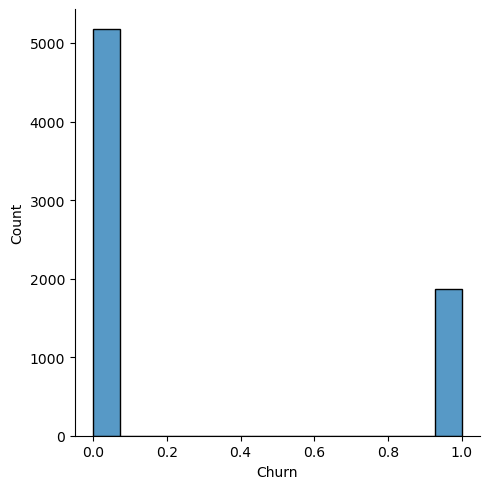

In [44]:
## Distribution of Churn v Not Churn in our data 
sns.displot(data= data, x='Churn')

<Axes: xlabel='tenure', ylabel='Churn'>

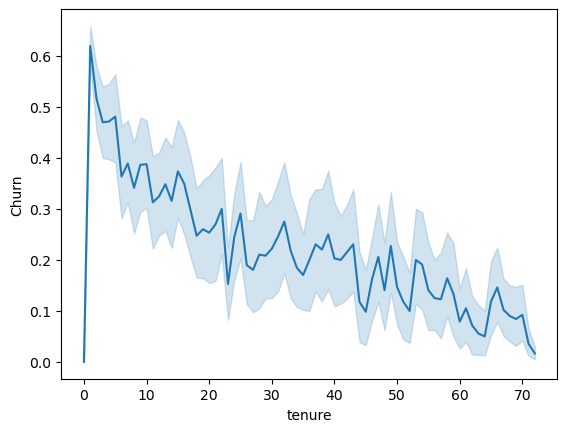

In [50]:
## Churn rate by tenure
sns.lineplot(data=data, x='tenure', y='Churn')
# As tenure increases, churn goes down and customers are likely to stay

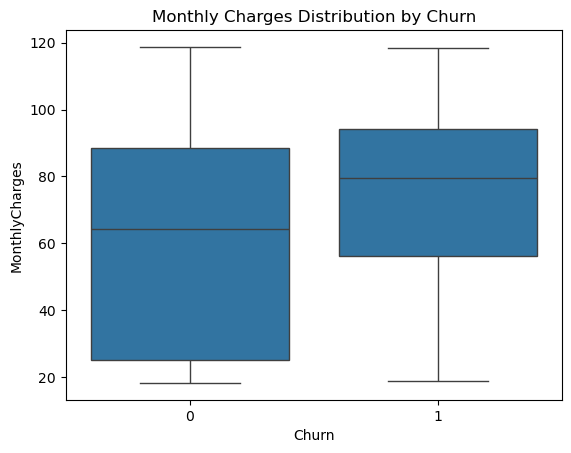

In [52]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=data)
plt.title('Monthly Charges Distribution by Churn')
plt.show()

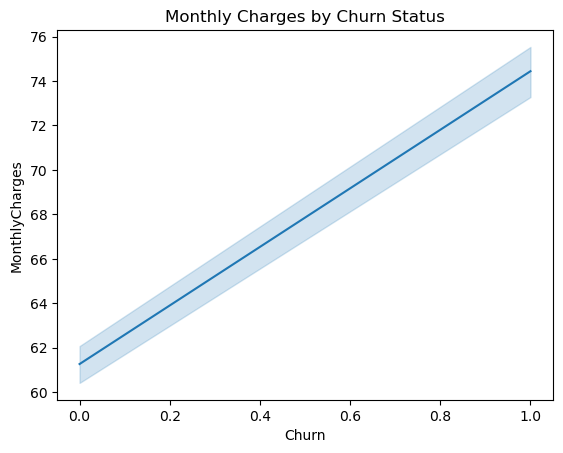

In [56]:
sns.lineplot(data=data, y='MonthlyCharges', x='Churn')
plt.title('Monthly Charges by Churn Status')
plt.show()

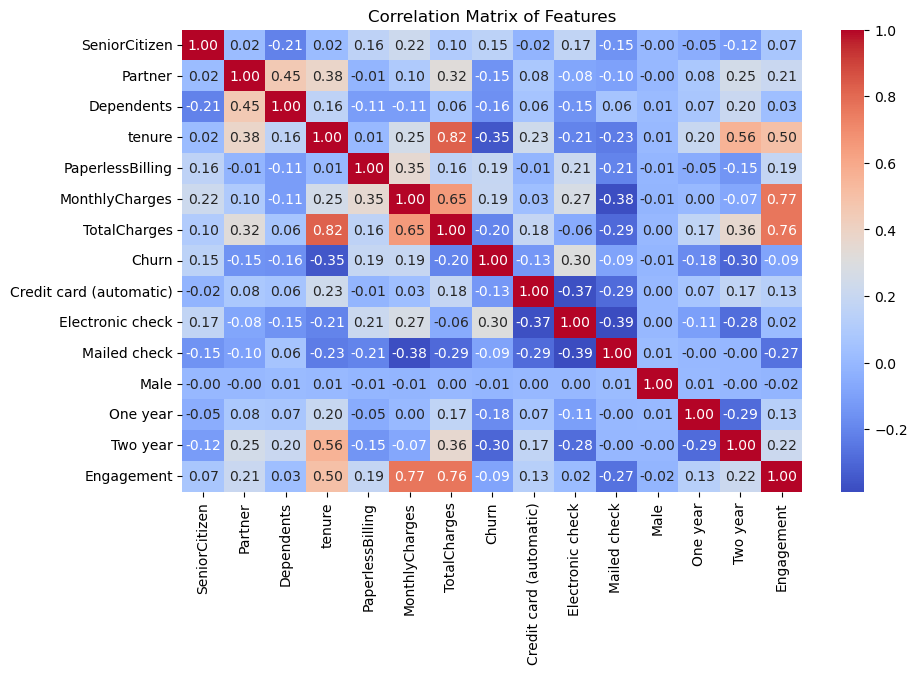

In [58]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

With Logistic Regression, we will use a set of independent variables to predict a dependent variable. In our case, the dependent variable we want to predict is 'Churn.' We can set our X and y variables to be used in our logistic regression model like this:

In [35]:
X= data.drop(['Churn'], axis=1)
y= data['Churn']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SeniorCitizen            7043 non-null   int64  
 1   Partner                  7043 non-null   int64  
 2   Dependents               7043 non-null   int64  
 3   tenure                   7043 non-null   int64  
 4   PaperlessBilling         7043 non-null   int64  
 5   MonthlyCharges           7043 non-null   float64
 6   TotalCharges             7043 non-null   float64
 7   Credit card (automatic)  7043 non-null   int64  
 8   Electronic check         7043 non-null   int64  
 9   Mailed check             7043 non-null   int64  
 10  Male                     7043 non-null   int64  
 11  One year                 7043 non-null   int64  
 12  Two year                 7043 non-null   int64  
 13  Engagement               7043 non-null   float64
dtypes: float64(3), int64(11)

Here, we set our X to our set of independent variables, which happens to be every column other than the 'Churn' column. Our y variable is the dependent variable and is the one we are trying to predict. This is set to the 'Churn' column.   

Next, we have to split our dataset into separate training and testing sets. The training set will be used to train our model, and the testing set will be used to validate after it is trained. This ensures the data used for testing has not yet been seen by our model:

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Now we create our model and train the model using our training dataset:

In [22]:
logmodel = LogisticRegression(max_iter=10000, class_weight='balanced')
logmodel.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000)

After our model is trained, we run our predictions using our X_test data. This data has not been seen by our model yet and we are trying to see how close our model's predictions line up with our y_test data. We can then print a classifaction report that compares the predictions our model made with the actual values in the y_test 'Churn' column to see how accurate our model is:

In [38]:
predictions = logmodel.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      0.71      0.81      1539
           1       0.52      0.85      0.65       574

    accuracy                           0.75      2113
   macro avg       0.73      0.78      0.73      2113
weighted avg       0.82      0.75      0.76      2113

